New code with new icons


In [11]:
import folium
import numpy as np
from folium import CustomIcon
from IPython.display import display  # Used to display the map inline in the notebook

def create_map_with_diverse_paths(locations, trucks, dump_yard, truck_icon_path, dump_yard_icon_path):
    # Create a map centered around the average location of the start points and the dump yard
    avg_lat = (trucks[0]['start']['lat'] + trucks[1]['start']['lat'] + dump_yard['lat']) / 3
    avg_lon = (trucks[0]['start']['lon'] + trucks[1]['start']['lon'] + dump_yard['lon']) / 3
    truck_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

    # URLs for different dustbin icons based on fill level
    green_bin_icon = "https://ik.imagekit.io/690kne5m6/Dustbin/green.png?updatedAt=1710261892393"
    orange_bin_icon = "https://ik.imagekit.io/690kne5m6/Dustbin/orange.png?updatedAt=1710261892385"
    red_bin_icon = "https://ik.imagekit.io/690kne5m6/Dustbin/red.png?updatedAt=1710261892478"

    # Add dustbins to the map with conditional icons based on fill level
    for loc in locations:
        # Determine which icon to use based on fill level
        if loc['fill_level'] < 50:
            icon_url = green_bin_icon
        elif loc['fill_level'] < 75:
            icon_url = orange_bin_icon
        else:
            icon_url = red_bin_icon

        dustbin_icon = CustomIcon(icon_url, icon_size=(30, 30))  # Set custom icon size

        folium.Marker(location=[loc['lat'], loc['lon']],
                      popup=f"Dustbin {loc['id']} - Fill Level: {loc['fill_level']}%",
                      icon=dustbin_icon).add_to(truck_map)

    # Define separate areas for each truck to cover using median latitude as the dividing line
    median_lat = np.median([loc['lat'] for loc in locations])
    truck1_dustbins = [loc for loc in locations if loc['lat'] <= median_lat]
    truck2_dustbins = [loc for loc in locations if loc['lat'] > median_lat]

    # Add paths for each truck
    for i, truck in enumerate(trucks):
        start = (truck['start']['lat'], truck['start']['lon'])

        # Get the dustbins assigned to the current truck
        truck_dustbins = truck1_dustbins if truck['id'] == "Truck1" else truck2_dustbins

        # Create a list of waypoints including the start, assigned dustbins, and dump yard
        path = [start] + [(bin['lat'], bin['lon']) for bin in truck_dustbins] + [(dump_yard['lat'], dump_yard['lon'])]

        color = "blue" if i == 0 else "green"  # Different color for each path
        folium.PolyLine(path, color=color, weight=2.5, opacity=1, popup=f"Route for {truck['id']}").add_to(truck_map)

        # Add starting points with the custom truck icon
        truck_icon = CustomIcon(truck_icon_path, icon_size=(30, 30))  # Use custom truck icon
        folium.Marker(location=[truck['start']['lat'], truck['start']['lon']],
                      popup=f"Truck Starting Point - {truck['id']}",
                      icon=truck_icon).add_to(truck_map)

    # Add dump yard marker with the new custom icon
    dump_yard_icon = CustomIcon(dump_yard_icon_path, icon_size=(30, 30))  # Use custom dump yard icon
    folium.Marker(location=[dump_yard['lat'], dump_yard['lon']],
                  popup="Dump Yard",
                  icon=dump_yard_icon).add_to(truck_map)

    # Display the map directly in the notebook
    display(truck_map)

# Example: Define environment parameters for Chennai
dump_yard = {"id": "AvadiDumpYard", "lat": 13.1147, "lon": 80.0982}
trucks = [
    {"id": "Truck1", "start": {"lat": 12.7, "lon": 80.0}},
    {"id": "Truck2", "start": {"lat": 12.85, "lon": 80.1}}
]

# Example: Define a larger set of locations (dustbins) along the path
locations = [
    {"id": 1, "lat": 12.75, "lon": 80.02, "fill_level": 60},
    {"id": 2, "lat": 12.8, "lon": 80.05, "fill_level": 40},
    {"id": 3, "lat": 12.85, "lon": 80.07, "fill_level": 70},
    {"id": 4, "lat": 12.9, "lon": 80.08, "fill_level": 85},
    {"id": 5, "lat": 12.92, "lon": 80.09, "fill_level": 30},
    {"id": 6, "lat": 12.95, "lon": 80.1, "fill_level": 55},
    {"id": 7, "lat": 13.0, "lon": 80.11, "fill_level": 40},
    {"id": 8, "lat": 13.05, "lon": 80.12, "fill_level": 65},
    {"id": 9, "lat": 13.1, "lon": 80.13, "fill_level": 80},
    {"id": 10, "lat": 13.15, "lon": 80.14, "fill_level": 25}
]

# File paths for icons
truck_icon_path = "https://ik.imagekit.io/yuq4cit8f/truck.png?updatedAt=1726028112394"
dump_yard_icon_path = "https://ik.imagekit.io/yuq4cit8f/landfill?updatedAt=1726028485489"

# Create the map with conditional dustbin icons and new dump yard icon
create_map_with_diverse_paths(locations, trucks, dump_yard, truck_icon_path, dump_yard_icon_path)


In [3]:
# Import necessary modules
try:
    from google.colab import files  # Google Colab specific import
    is_colab = True
except ImportError:
    is_colab = False
import webbrowser  # Used for local environments to open the HTML file

# Assuming 'create_map_with_diverse_paths' is defined earlier and generates the map
output_filename = "truck_routes_map.html"
create_map_with_diverse_paths(locations, trucks, dump_yard, truck_icon_path, dump_yard_icon_path, output_filename)

# Check the environment and download the file
if is_colab:
    # In Google Colab, use the `files.download()` method
    files.download(output_filename)
else:
    # In local environments, open the file in the browser
    webbrowser.open(output_filename)


Map saved as truck_routes_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dashboard


In [4]:
pip install haversine


<ipython-input-5-d65e135eae33>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Truck ID", y="Time Efficiency (hours)", data=df, palette="viridis")


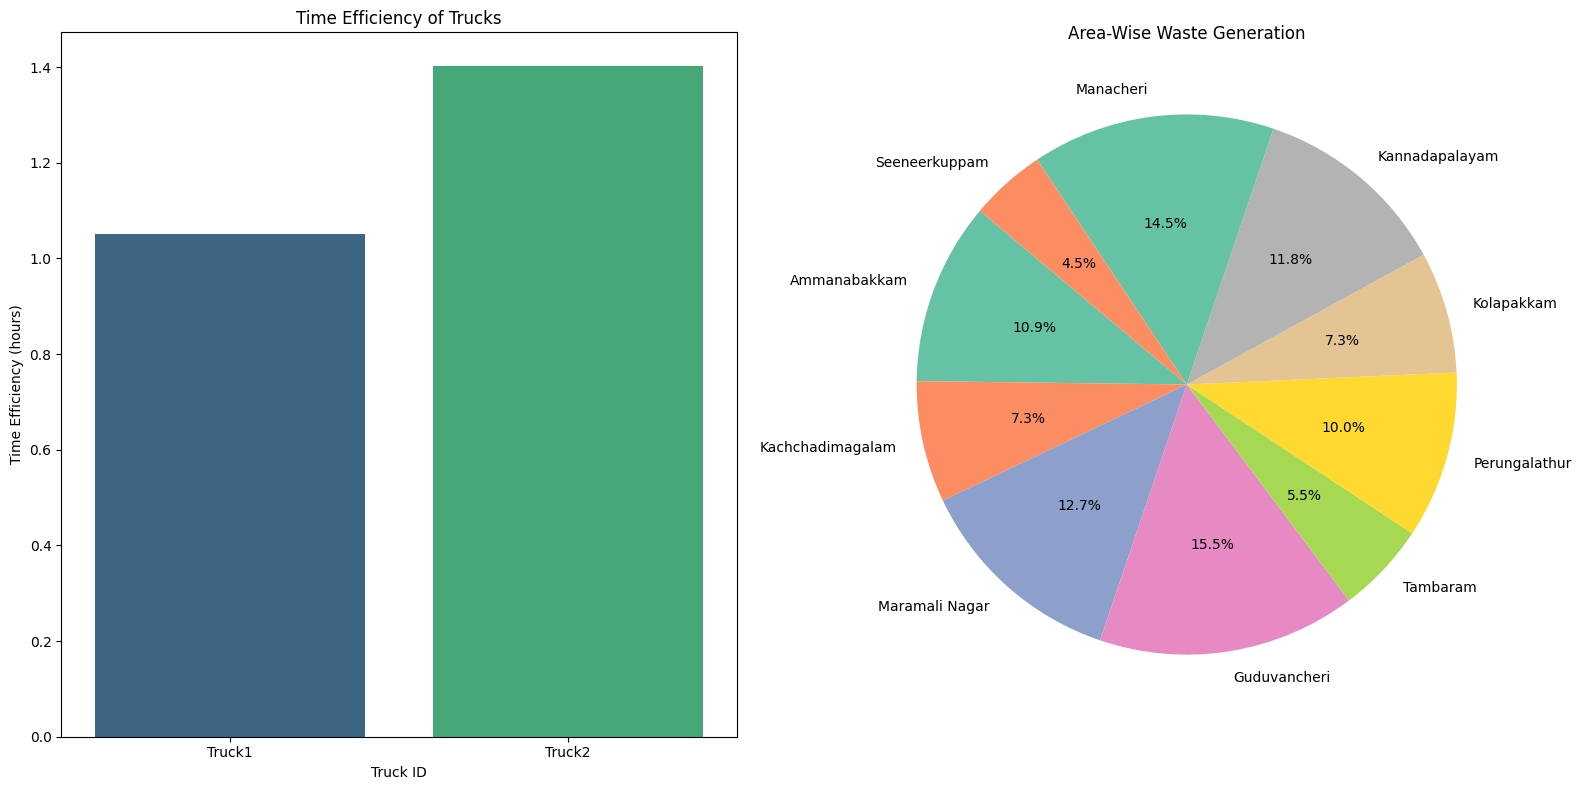

Total waste dumped at Avadi: 1.70 tonnes


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

# Haversine formula implementation
def calculate_distance(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = radians(coord1['lat']), radians(coord1['lon'])
    lat2, lon2 = radians(coord2['lat']), radians(coord2['lon'])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

# Define parameters
dump_yard = {"id": "AvadiDumpYard", "lat": 13.1147, "lon": 80.0982}
trucks = [
    {"id": "Truck1", "start": {"lat": 12.7, "lon": 80.0}, "speed_kmh": 45},
    {"id": "Truck2", "start": {"lat": 12.85, "lon": 80.1}, "speed_kmh": 40}
]

# Updated locations with their names
locations = [
    {"id": 1, "lat": 12.75, "lon": 80.02, "fill_level": 60, "name": "Ammanabakkam"},
    {"id": 2, "lat": 12.8, "lon": 80.05, "fill_level": 40, "name": "Kachchadimagalam"},
    {"id": 3, "lat": 12.85, "lon": 80.07, "fill_level": 70, "name": "Maramali Nagar"},
    {"id": 4, "lat": 12.9, "lon": 80.08, "fill_level": 85, "name": "Guduvancheri"},
    {"id": 5, "lat": 12.92, "lon": 80.09, "fill_level": 30, "name": "Tambaram"},
    {"id": 6, "lat": 12.95, "lon": 80.1, "fill_level": 55, "name": "Perungalathur"},
    {"id": 7, "lat": 13.0, "lon": 80.11, "fill_level": 40, "name": "Kolapakkam"},
    {"id": 8, "lat": 13.05, "lon": 80.12, "fill_level": 65, "name": "Kannadapalayam"},
    {"id": 9, "lat": 13.1, "lon": 80.13, "fill_level": 80, "name": "Manacheri"},
    {"id": 10, "lat": 13.15, "lon": 80.14, "fill_level": 25, "name": "Seeneerkuppam"}
]

def calculate_route_time(truck, locations, dump_yard):
    start_coord = truck['start']
    truck_speed = truck['speed_kmh']

    # Calculate distances
    route = [start_coord] + [loc for loc in locations] + [dump_yard]
    total_distance = sum(calculate_distance(route[i], route[i+1]) for i in range(len(route) - 1))

    # Calculate time in hours
    time_hours = total_distance / truck_speed
    return total_distance, time_hours

def calculate_waste(locations):
    # Assume 1000 liters per bin and 1 liter of waste per percent fill level
    total_waste = sum(loc['fill_level'] * 1000 / 100 for loc in locations)
    return total_waste

# DataFrame to hold results
results = []

for truck in trucks:
    truck_locations = [loc for loc in locations if loc['lat'] <= truck['start']['lat']]  # Example filtering
    total_distance, time_hours = calculate_route_time(truck, truck_locations, dump_yard)
    total_waste = calculate_waste(truck_locations)

    results.append({
        "Truck ID": truck['id'],
        "Total Distance (km)": total_distance,
        "Time Efficiency (hours)": time_hours,
        "Total Waste (Liters)": total_waste
    })

df = pd.DataFrame(results)

# Convert total waste from liters to tonnes
df["Total Waste (Tonnes)"] = df["Total Waste (Liters)"] / 1000

# Calculate total waste dumped in Avadi
total_waste_dumped = sum(df["Total Waste (Liters)"]) / 1000  # in tonnes

# Save to Excel
df.to_excel("truck_efficiency_waste.xlsx", index=False)

# Data Visualization
plt.figure(figsize=(16, 8))

# Plot Time Efficiency
plt.subplot(1, 2, 1)
sns.barplot(x="Truck ID", y="Time Efficiency (hours)", data=df, palette="viridis")
plt.title("Time Efficiency of Trucks")

# Plot Pie Chart for Area-Wise Waste Generation with "Set2" colors
waste_by_area = {loc['name']: loc['fill_level'] * 1000 / 100 for loc in locations}
areas = list(waste_by_area.keys())
wastes = list(waste_by_area.values())

plt.subplot(1, 2, 2)
plt.pie(wastes, labels=areas, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(areas)), startangle=140)
plt.title("Area-Wise Waste Generation")

plt.tight_layout()
plt.show()

# Print total waste dumped at Avadi
print(f"Total waste dumped at Avadi: {total_waste_dumped:.2f} tonnes")
